# **Natural Language Processing (NLP) for Machine Learning**

NLP is a field in machine learning with the ability of a computer to understand, analyze, manipulate, and potentially generate human language.

NLP in Real Life:
1.   Information Retrieval (Google finds relevant and similar results).
2.   Information Extraction (Gmail structures events from emails).
3.   Machine Translation (Google Translate translates language from one language to another).
4.   Text Simplification (Rewordify simplifies the meaning of sentences). Shashi Tharoor tweets could be used (pun intended).
5.   Sentiment Analysis (Hater News gives us the sentiment of the user).
6.   Text Summarization (Smmry or Reddit’s autotldr gives a summary of sentences).
7.   Spam Filter (Gmail filters spam emails separately).
8.   Auto-Predict (Google Search predicts user search results).
9.   Auto-Correct (Google Keyboard and Grammarly correct words otherwise spelled wrong).
10.  Speech Recognition (Google WebSpeech or Vocalware).
11.  Question Answering (IBM Watson’s answers to a query).
12.  Natural Language Generation (Generation of text from image or video data.)

**(Natural Language Toolkit) NLTK**: NLTK is a popular open-source package in Python. Rather than building all tools from scratch, NLTK provides all common NLP Tasks.

**Installing NLTK**

Type `!pip install nltk` in the Jupyter Notebook or if it doesn’t work in cmd type `conda install -c conda-forge nltk`. This should work in most cases.

Install NLTK: http://pypi.python.org/pypi/nltk

In [1]:
!pip install nltk

**Importing NLTK Library**

After typing `nltk.download()` , we get an NLTK Downloader Application which is helpful in NLP Tasks. **Stopwords** Corpus a package which helps in removing redundant repeated words. Similarly, we can install other useful packages.

In [3]:
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> l

Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)
  [ ] cess_cat............ CESS-CAT Treebank
  [ ] cess_esp............ CESS-ESP Treebank
  [ ] chat80.....

True

# Reading and Exploring Dataset

Reading in text data & why do we need to clean the text?

While reading data, we get data in the structured or unstructured format. A structured format has a well-defined pattern whereas unstructured data has no proper structure. In between the 2 structures, we have a semi-structured format which is a comparably better structured than unstructured format.

In [26]:
# read raw data
rawdata = open("SMSSpamCollection.tsv").read()
rawdata[0:250]

"ham\tI've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.\nspam\tFree entry in 2 a wkly comp to win FA Cup fi"

In [28]:
# read raw data by lines
rawdata = open("SMSSpamCollection.tsv", "r").readlines()
rawdata[0:10]

["ham\tI've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.\n",
 "spam\tFree entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's\n",
 "ham\tNah I don't think he goes to usf, he lives around here though\n",
 'ham\tEven my brother is not like to speak with me. They treat me like aids patent.\n',
 'ham\tI HAVE A DATE ON SUNDAY WITH WILL!!\n',
 "ham\tAs per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune\n",
 'spam\tWINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.\n',
 'spam\tHad your mobile 11 months or more? U R entitled to Update to the 

As we can see from above when we read semi-structured data,
it is hard to interpret. So, we use **pandas** to easily understand our data.

In [32]:
import pandas as pd
# reading tab separated values
data = pd.read_csv("SMSSpamCollection.tsv", sep='\t', names=['label', 'body_text'])
data.head()

,label,body_text
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [34]:
# What is the shape of the dataset?

print("Input data has {} rows and {} columns".format(len(data), len(data.columns)))

Input data has 5568 rows and 3 columns


In [36]:
# How many spam/ham are there?

print("Out of {} rows, {} are spam, {} are ham".format(len(data),
                                                       len(data[data['label']=='spam']),
                                                       len(data[data['label']=='ham'])))

Out of 5568 rows, 746 are spam, 4822 are ham


In [37]:
# How much missing data is there?

print("Number of null in label: {}".format(data['label'].isnull().sum()))
print("Number of null in text: {}".format(data['body_text'].isnull().sum()))

Number of null in label: 0
Number of null in text: 0


# Pre-processing Data

Cleaning up the text data is necessary to highlight attributes that we’re going to want our machine learning system to pick up on. Cleaning (or pre-processing) the data typically consists of a number of steps:

**1. Remove punctuation**

Punctuation can provide grammatical context to a sentence which supports our understanding. But for our vectorizer which counts the number of words and not the context, it does not add value, so we remove all special characters. eg: `How are you? -> How are you`

In [30]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [33]:
# remove punctuation from text
def remove_punctuation(text):
  text_nopunct = "".join([char for char in text if char not in string.punctuation])
  return text_nopunct

# apply function
data['body_text_clean'] = data['body_text'].apply(lambda x: remove_punctuation(x))
data.head()

,label,body_text,body_text_clean
0,ham,I've been searching for the right words to tha...,Ive been searching for the right words to than...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL


In `body_text_clean`, we can see that all punctuations like `I’ve -> Ive` are omitted.


**2. Tokenization**

Tokenizing separates text into units such as sentences or words. It gives structure to previously unstructured text. 
eg: `Plata o Plomo-> ‘Plata’,’o’,’Plomo’`.

In [38]:
import re

# tokenize words
def tokenize(text):
  t = text.lower()               # We convert to lower as Python is case-sensitive.
  tokens = re.split('\W+', t)    # W+ means that either a word character (A-Za-z0-9_) or a dash (-) can go there.
  return tokens

# apply function
data['body_text_tokenized'] = data['body_text_clean'].apply(lambda x: tokenize(x)) 
data.head()

,label,body_text,body_text_clean,body_text_tokenized
0,ham,I've been searching for the right words to tha...,Ive been searching for the right words to than...,"[ive, been, searching, for, the, right, words,..."
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l..."
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...,"[even, my, brother, is, not, like, to, speak, ..."
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]"


In [41]:
# we can also use tokenize from nltk
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer("[\w']+")
data['body_text_clean'].apply(lambda x: tokenizer.tokenize(x)).head()

0    [Ive, been, searching, for, the, right, words,...
1    [Free, entry, in, 2, a, wkly, comp, to, win, F...
2    [Nah, I, dont, think, he, goes, to, usf, he, l...
3    [Even, my, brother, is, not, like, to, speak, ...
4           [I, HAVE, A, DATE, ON, SUNDAY, WITH, WILL]
Name: body_text_clean, dtype: object

In [43]:
# another method
from nltk.tokenize import regexp_tokenize

data['body_text_clean'].apply(lambda x: regexp_tokenize(x, "[\w']+")).head()

0    [Ive, been, searching, for, the, right, words,...
1    [Free, entry, in, 2, a, wkly, comp, to, win, F...
2    [Nah, I, dont, think, he, goes, to, usf, he, l...
3    [Even, my, brother, is, not, like, to, speak, ...
4           [I, HAVE, A, DATE, ON, SUNDAY, WITH, WILL]
Name: body_text_clean, dtype: object

In `body_text_tokenized`, we can see that all words are generated as tokens.

**3. Remove stopwords**

Stopwords are common words that will likely appear in any text. They don’t tell us much about our data so let's remove them. 
eg: `silver or lead is fine for me -> silver, lead, fine`.

In [46]:
# get all english stopwords
stopwords = nltk.corpus.stopwords.words("english")

In [47]:
# remove stopwords
def remove_stopwords(tokenized_list):
  return [word for word in tokenized_list if word not in stopwords]

# apply function
data['body_text_nostop'] = data['body_text_tokenized'].apply(lambda x: remove_stopwords(x)) 
data.head()

,label,body_text,body_text_clean,body_text_tokenized,body_text_nostop
0,ham,I've been searching for the right words to tha...,Ive been searching for the right words to than...,"[ive, been, searching, for, the, right, words,...","[ive, searching, right, words, thank, breather..."
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t..."
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...,"[even, my, brother, is, not, like, to, speak, ...","[even, brother, like, speak, treat, like, aids..."
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]"


In `body_text_nostop`, all unnecessary words like been, for, the are removed.

**4. Stemming**

Stemming helps us to reduce a word to its stem form. It often makes sense to treat related words in the same way. It removes suffices, like `“ing”, “ly”, “s”`, etc. by a simple rule-based approach. It reduces the corpus of words but often the actual words get neglected. 
eg: `Entitling, Entitled -> Entitl`

*Note*: Some search engines treat words with the same stem as synonyms.

In [48]:
# Porter stemmer stemming algorithms
ps = nltk.PorterStemmer()

In [56]:
# stemming words
def stemming(tokenized_text):
  text = [ps.stem(word) for word in tokenized_text]
  return text

# apply function
data['body_text_stemmed'] = data['body_text_nostop'].apply(lambda x: stemming(x)) 
data.head()

,label,body_text,body_text_clean,body_text_tokenized,body_text_nostop,body_text_stemmed
0,ham,I've been searching for the right words to tha...,Ive been searching for the right words to than...,"[ive, been, searching, for, the, right, words,...","[ive, searching, right, words, thank, breather...","[ive, search, right, word, thank, breather, pr..."
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin..."
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho..."
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...,"[even, my, brother, is, not, like, to, speak, ...","[even, brother, like, speak, treat, like, aids...","[even, brother, like, speak, treat, like, aid,..."
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]","[date, sunday]"


In `body_text_stemmed`, words like entry,wkly is stemmed to entri, wkli even though don’t mean anything.

**5. Lemmatizing**

Lemmatizing derives the canonical form (‘lemma’) of a word. i.e the root form. It is better than stemming as it uses a dictionary-based approach i.e a morphological analysis to the root word.
eg: `Entitling, Entitled -> Entitle`

In Short, Stemming is typically faster as it simply chops off the end of the word, without understanding the context of the word. Lemmatizing is slower and more accurate as it takes an informed analysis with the context of the word in mind.

In [50]:
# WordNet Lemmatizer
# Lemmatize using WordNet's built-in morphy function.
wn = nltk.WordNetLemmatizer()

In [57]:
def lemmatize(tokenized_text):
  text = [wn.lemmatize(word) for word in tokenized_text]
  return text

# apply function
data['body_text_lemmatized'] = data['body_text_nostop'].apply(lambda x: stemming(x)) 
data.head()

,label,body_text,body_text_clean,body_text_tokenized,body_text_nostop,body_text_stemmed,body_text_lemmatized
0,ham,I've been searching for the right words to tha...,Ive been searching for the right words to than...,"[ive, been, searching, for, the, right, words,...","[ive, searching, right, words, thank, breather...","[ive, search, right, word, thank, breather, pr...","[ive, search, right, word, thank, breather, pr..."
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin..."
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho...","[nah, dont, think, goe, usf, live, around, tho..."
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...,"[even, my, brother, is, not, like, to, speak, ...","[even, brother, like, speak, treat, like, aids...","[even, brother, like, speak, treat, like, aid,...","[even, brother, like, speak, treat, like, aid,..."
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]","[date, sunday]","[date, sunday]"


In `body_text_stemmed`, we can see words like `chances` are lemmatized to `chance`, whereas it is stemmed to `chanc`.

**Saving the cleaned Data**

In [58]:
# We save the file as CSV 
# CSV(Comma-separated-value), It is easier to read compared to tsv(Tab-separated-value) and can be opened on Excel.
data.to_csv("SMSSpam_cleaned.csv", sep=',')

# Vectorizing Data

Machine learning algorithms cannot work with raw text directly. Rather, the text must be converted into vectors of numbers. Vectorizing is the process of encoding text as integers i.e. numeric form to create feature vectors so that machine learning algorithms can understand our data.

**1. Vectorizing Data: Bag-Of-Words**

In natural language processing, a common technique for extracting features from text is to place all of the words that occur in the text in a bucket. This aproach is called a bag of words model or BoW for short. It’s referred to as a “bag” of words because any information about the structure of the sentence is lost.

Bag of Words (BoW) or CountVectorizer describes the presence of words within the text data. It gives a result of 1 if present in the sentence and 0 if not present. It, therefore, creates a bag of words with a document-matrix count in each text document.

In [59]:
# remove punctuation, tokenize, remove stopwords, and stem
def clean_text(text):
    text_nopunct = "".join([char for char in text if char not in string.punctuation]).lower()
    tokens = re.split('\W+', text_nopunct)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

In [61]:
pd.set_option('display.max_colwidth', 100) # To extend column width

In [62]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(analyzer=clean_text)
X_counts = count_vect.fit_transform(data['body_text'])
print(X_counts.shape)
print(count_vect.get_feature_names())

(5568, 8107)
['', '0', '008704050406', '0089mi', '0121', '01223585236', '01223585334', '0125698789', '02', '020603', '0207', '02070836089', '02072069400', '02073162414', '02085076972', '020903', '021', '050703', '0578', '06', '060505', '061104', '07008009200', '07046744435', '07090201529', '07090298926', '07099833605', '071104', '07123456789', '0721072', '07732584351', '07734396839', '07742676969', '07753741225', '0776xxxxxxx', '07786200117', '077xxx', '078', '07801543489', '07808', '07808247860', '07808726822', '07815296484', '07821230901', '0784987', '0789xxxxxxx', '0794674629107880867867', '0796xxxxxx', '07973788240', '07xxxxxxxxx', '0800', '08000407165', '08000776320', '08000839402', '08000930705', '08000938767', '08001950382', '08002888812', '08002986030', '08002986906', '08002988890', '08006344447', '0808', '08081263000', '08081560665', '0825', '0844', '08448350055', '08448714184', '0845', '08450542832', '08452810071', '08452810073', '08452810075over18', '0870', '08700621170150p'

In [63]:
# create dataframe for vector counts
X_counts_df = pd.DataFrame(X_counts.toarray(), columns=count_vect.get_feature_names())
X_counts_df.head()

,,0,008704050406,0089mi,0121,01223585236,01223585334,0125698789,02,020603,0207,02070836089,02072069400,02073162414,02085076972,020903,021,050703,0578,06,060505,061104,07008009200,07046744435,07090201529,07090298926,07099833605,071104,07123456789,0721072,07732584351,07734396839,07742676969,07753741225,0776xxxxxxx,07786200117,077xxx,078,07801543489,07808,...,yourjob,youso,youthat,youto,youuuuu,youv,youwanna,youwhen,yovil,yowif,yoyyooo,yr,ystrdayic,yummi,yummmm,yun,yunni,yuo,yuou,yup,yupz,ywhere,z,zac,zaher,zealand,zebra,zed,zero,zhong,zindgi,zoe,zogtoriu,zoom,zouk,zyada,é,ü,üll,〨ud
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


BoW is applied on the `body_text`, so the count of each word is stored in the document matrix. By casting the bag of words to a set, we can automatically remove any duplicate words.

Problem with the **bag of words** approach is that it doesn’t account for noise. In other words, certain words are used to formulate sentences but do not add any semantic meaning to the text. For example, the most commonly used word in the english language is the which represents 7% of all words written or spoken. You couldn’t make deduce anything about a text given the fact that it contains the word the. On the other hand, words like good and awesome could be used to determine whether a rating was positive or not.

**2. Vectorizing Data: N-Grams**

N-grams are simply all combinations of adjacent words or letters of length n that we can find in our source text. Ngrams with n=1 are called `unigrams`. Similarly, `bigrams` (n=2), `trigrams` (n=3) and so on can also be used.

`"plata o plomo means silver or lead"`

| n | Name    | Tokens                                                                                         |
|---|---------|------------------------------------------------------------------------------------------------|
| 2 | bigram  | ["plata o", "o plomo", "plomo means", "means silver", "silver or","or lead"]                   |
| 3 | trigram | ["plata o plomo", "o plomo means", "plomo means silver", "means silver or ", "silver or lead"] |


In [64]:
ngram_vect = CountVectorizer(ngram_range=(2,2),analyzer=clean_text) # It applies only bigram vectorizer
X_counts = ngram_vect.fit_transform(data['body_text'])
print(X_counts.shape)
print(ngram_vect.get_feature_names())

(5568, 8107)
['', '0', '008704050406', '0089mi', '0121', '01223585236', '01223585334', '0125698789', '02', '020603', '0207', '02070836089', '02072069400', '02073162414', '02085076972', '020903', '021', '050703', '0578', '06', '060505', '061104', '07008009200', '07046744435', '07090201529', '07090298926', '07099833605', '071104', '07123456789', '0721072', '07732584351', '07734396839', '07742676969', '07753741225', '0776xxxxxxx', '07786200117', '077xxx', '078', '07801543489', '07808', '07808247860', '07808726822', '07815296484', '07821230901', '0784987', '0789xxxxxxx', '0794674629107880867867', '0796xxxxxx', '07973788240', '07xxxxxxxxx', '0800', '08000407165', '08000776320', '08000839402', '08000930705', '08000938767', '08001950382', '08002888812', '08002986030', '08002986906', '08002988890', '08006344447', '0808', '08081263000', '08081560665', '0825', '0844', '08448350055', '08448714184', '0845', '08450542832', '08452810071', '08452810073', '08452810075over18', '0870', '08700621170150p'

In [67]:
# create dataframe for N-gram vector counts
X_counts_df = pd.DataFrame(X_counts.toarray(), columns=ngram_vect.get_feature_names())
X_counts_df.head()

,,0,008704050406,0089mi,0121,01223585236,01223585334,0125698789,02,020603,0207,02070836089,02072069400,02073162414,02085076972,020903,021,050703,0578,06,060505,061104,07008009200,07046744435,07090201529,07090298926,07099833605,071104,07123456789,0721072,07732584351,07734396839,07742676969,07753741225,0776xxxxxxx,07786200117,077xxx,078,07801543489,07808,...,yourjob,youso,youthat,youto,youuuuu,youv,youwanna,youwhen,yovil,yowif,yoyyooo,yr,ystrdayic,yummi,yummmm,yun,yunni,yuo,yuou,yup,yupz,ywhere,z,zac,zaher,zealand,zebra,zed,zero,zhong,zindgi,zoe,zogtoriu,zoom,zouk,zyada,é,ü,üll,〨ud
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


N-Gram is applied on the `body_text`, so the count of each group words in a sentence word is stored in the document matrix.

**3. Vectorizing Data: TF-IDF**

*Term Frequency (TF)*: The number of times a word appears in a document divded by the total number of words in the document. Every document has its own term frequency.

*Inverse Data Frequency (IDF)*: The log of the number of documents divided by the number of documents that contain the word w. Inverse data frequency determines the weight of rare words across all documents in the corpus. The IDF is computed once for all documents

*TF-IDF* computes “relative frequency” that a word appears in a document compared to its frequency across all documents. TF-IDF is simply the TF multiplied by IDF. It is more useful than “term frequency” for identifying “important” words in each document (high frequency in that document, low frequency in other documents).

e.g: Used for search engine scoring, text summarization, document clustering.


In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(data['body_text'])
print(X_tfidf.shape)
print(tfidf_vect.get_feature_names())

(5568, 8107)
['', '0', '008704050406', '0089mi', '0121', '01223585236', '01223585334', '0125698789', '02', '020603', '0207', '02070836089', '02072069400', '02073162414', '02085076972', '020903', '021', '050703', '0578', '06', '060505', '061104', '07008009200', '07046744435', '07090201529', '07090298926', '07099833605', '071104', '07123456789', '0721072', '07732584351', '07734396839', '07742676969', '07753741225', '0776xxxxxxx', '07786200117', '077xxx', '078', '07801543489', '07808', '07808247860', '07808726822', '07815296484', '07821230901', '0784987', '0789xxxxxxx', '0794674629107880867867', '0796xxxxxx', '07973788240', '07xxxxxxxxx', '0800', '08000407165', '08000776320', '08000839402', '08000930705', '08000938767', '08001950382', '08002888812', '08002986030', '08002986906', '08002988890', '08006344447', '0808', '08081263000', '08081560665', '0825', '0844', '08448350055', '08448714184', '0845', '08450542832', '08452810071', '08452810073', '08452810075over18', '0870', '08700621170150p'

In [69]:
X_tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vect.get_feature_names())
X_tfidf_df.head()

,,0,008704050406,0089mi,0121,01223585236,01223585334,0125698789,02,020603,0207,02070836089,02072069400,02073162414,02085076972,020903,021,050703,0578,06,060505,061104,07008009200,07046744435,07090201529,07090298926,07099833605,071104,07123456789,0721072,07732584351,07734396839,07742676969,07753741225,0776xxxxxxx,07786200117,077xxx,078,07801543489,07808,...,yourjob,youso,youthat,youto,youuuuu,youv,youwanna,youwhen,yovil,yowif,yoyyooo,yr,ystrdayic,yummi,yummmm,yun,yunni,yuo,yuou,yup,yupz,ywhere,z,zac,zaher,zealand,zebra,zed,zero,zhong,zindgi,zoe,zogtoriu,zoom,zouk,zyada,é,ü,üll,〨ud
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [70]:
print(X_tfidf_df.loc[(X_tfidf_df!=0).any(axis=1)])

             0  008704050406  0089mi  0121  ...  zyada    é         ü  üll  〨ud
0     0.0  0.0           0.0     0.0   0.0  ...    0.0  0.0  0.000000  0.0  0.0
1     0.0  0.0           0.0     0.0   0.0  ...    0.0  0.0  0.000000  0.0  0.0
2     0.0  0.0           0.0     0.0   0.0  ...    0.0  0.0  0.000000  0.0  0.0
3     0.0  0.0           0.0     0.0   0.0  ...    0.0  0.0  0.000000  0.0  0.0
4     0.0  0.0           0.0     0.0   0.0  ...    0.0  0.0  0.000000  0.0  0.0
...   ...  ...           ...     ...   ...  ...    ...  ...       ...  ...  ...
5563  0.0  0.0           0.0     0.0   0.0  ...    0.0  0.0  0.000000  0.0  0.0
5564  0.0  0.0           0.0     0.0   0.0  ...    0.0  0.0  0.335215  0.0  0.0
5565  0.0  0.0           0.0     0.0   0.0  ...    0.0  0.0  0.000000  0.0  0.0
5566  0.0  0.0           0.0     0.0   0.0  ...    0.0  0.0  0.000000  0.0  0.0
5567  0.0  0.0           0.0     0.0   0.0  ...    0.0  0.0  0.000000  0.0  0.0

[5567 rows x 8107 columns]


TF-IDF is applied on the `body_text`, so the relative count of each word in the sentences is stored in the document matrix.

Note: Vectorizers outputs sparse matrices. Sparse Matrix is a matrix in which most entries are 0. In the interest of efficient storage, a sparse matrix will be stored by only storing the locations of the non-zero elements.

# Feature Engineering: Feature Creation

Feature engineering is the process of using domain knowledge of the data to create features that make machine learning algorithms work. It is like an art as it requires domain knowledge and it can tough to create features, but it can be fruitful for ML algorithm to predict results as they can be related to the prediction.

In [71]:
# calculate length of message excluding space
data['body_len'] = data['body_text'].apply(lambda x: len(x) - x.count(" "))
data.head()

,label,body_text,body_text_clean,body_text_tokenized,body_text_nostop,body_text_stemmed,body_text_lemmatized,body_len
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,Ive been searching for the right words to thank you for this breather I promise i wont take your...,"[ive, been, searching, for, the, right, words, to, thank, you, for, this, breather, i, promise, ...","[ive, searching, right, words, thank, breather, promise, wont, take, help, granted, fulfil, prom...","[ive, search, right, word, thank, breather, promis, wont, take, help, grant, fulfil, promis, won...","[ive, search, right, word, thank, breather, promis, wont, take, help, grant, fulfil, promis, won...",160
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...","[free, entri, 2, wkli, comp, win, fa, cup, final, tkt, 21st, may, 2005, text, fa, 87121, receiv,...","[free, entri, 2, wkli, comp, win, fa, cup, final, tkt, 21st, may, 2005, text, fa, 87121, receiv,...",128
2,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, dont, think, goes, usf, lives, around, though]","[nah, dont, think, goe, usf, live, around, though]","[nah, dont, think, goe, usf, live, around, though]",49
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent,"[even, my, brother, is, not, like, to, speak, with, me, they, treat, me, like, aids, patent]","[even, brother, like, speak, treat, like, aids, patent]","[even, brother, like, speak, treat, like, aid, patent]","[even, brother, like, speak, treat, like, aid, patent]",62
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]","[date, sunday]","[date, sunday]",28


In [72]:
# Create feature for text message length and % of punctuation in text
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

# apply function
data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))
data.head()

,label,body_text,body_text_clean,body_text_tokenized,body_text_nostop,body_text_stemmed,body_text_lemmatized,body_len,punct%
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,Ive been searching for the right words to thank you for this breather I promise i wont take your...,"[ive, been, searching, for, the, right, words, to, thank, you, for, this, breather, i, promise, ...","[ive, searching, right, words, thank, breather, promise, wont, take, help, granted, fulfil, prom...","[ive, search, right, word, thank, breather, promis, wont, take, help, grant, fulfil, promis, won...","[ive, search, right, word, thank, breather, promis, wont, take, help, grant, fulfil, promis, won...",160,2.5
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...","[free, entri, 2, wkli, comp, win, fa, cup, final, tkt, 21st, may, 2005, text, fa, 87121, receiv,...","[free, entri, 2, wkli, comp, win, fa, cup, final, tkt, 21st, may, 2005, text, fa, 87121, receiv,...",128,4.7
2,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, dont, think, goes, usf, lives, around, though]","[nah, dont, think, goe, usf, live, around, though]","[nah, dont, think, goe, usf, live, around, though]",49,4.1
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent,"[even, my, brother, is, not, like, to, speak, with, me, they, treat, me, like, aids, patent]","[even, brother, like, speak, treat, like, aids, patent]","[even, brother, like, speak, treat, like, aid, patent]","[even, brother, like, speak, treat, like, aid, patent]",62,3.2
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]","[date, sunday]","[date, sunday]",28,7.1


* `body_len` shows the length of words excluding whitespaces in a message body.
* `punct%` shows the percentage of punctuation marks in a message body.

**Check If Features are good or not:**

In [73]:
#For Visualizing to check if message body length and % of punctuation is good feature or not.
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

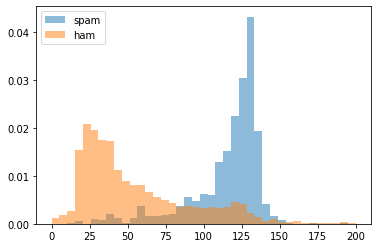

In [78]:
bins = np.linspace(0, 200, 40)

plt.hist(data[data['label']=='spam']['body_len'], bins, alpha=0.5, density=True, label='spam')
plt.hist(data[data['label']=='ham']['body_len'], bins, alpha=0.5, density=True, label='ham')
plt.legend(loc='upper left')
plt.show()

We can clearly see that Spams have a high number of words as compared to Hams. So it’s a good feature to distinguish.

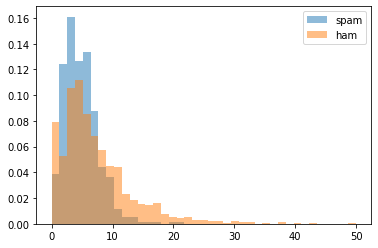

In [79]:
bins = np.linspace(0, 50, 40)

plt.hist(data[data['label']=='spam']['punct%'], bins, alpha=0.5, density=True, label='spam')
plt.hist(data[data['label']=='ham']['punct%'], bins, alpha=0.5, density=True, label='ham')
plt.legend(loc='upper right')
plt.show()

Spam has a percentage of punctuations but not that far away from Ham. Surprising as at times spam emails can contain a lot of punctuation marks. But still, it can be identified as a good feature.

# Building ML Classifiers: Model selection

We use an ensemble method of machine learning where multiple models are used and their combination produces better results than a single model (Support Vector Machine/Naive Bayes). Ensemble methods are the first choice for many Kaggle Competitions. Random Forest i.e multiple random decision trees are constructed and the aggregates of each tree are used for the final prediction. It can be used for classification as well as regression problems. It follows a bagging strategy where randomly.

**Grid-search:** It exhaustively searches overall parameter combinations in a given grid to determine the best model.

**Cross-validation:** It divides a data set into k subsets and repeat the method k times where a different subset is used as the test set i.e in each iteration.

In [83]:
# TF-IDF
tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(data['body_text'])
X_tfidf_feat = pd.concat([data['body_len'], data['punct%'], pd.DataFrame(X_tfidf.toarray())], axis=1)

# CountVectorizer
count_vect = CountVectorizer(analyzer=clean_text)
X_count = count_vect.fit_transform(data['body_text'])
X_count_feat = pd.concat([data['body_len'], data['punct%'], pd.DataFrame(X_count.toarray())], axis=1)


In [85]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# For CountVectorizer:
rf = RandomForestClassifier()
param = {'n_estimators': [10, 150, 300],
        'max_depth': [30, 60, 90, None]}

gs = GridSearchCV(rf, param, cv=5, n_jobs=-1) # n_jobs=-1 for parallelizing search
gs_fit = gs.fit(X_count_feat, data['label'])
pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score', ascending=False).head()

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
8,39.725344,1.275748,0.432827,0.182627,90,300,"{'max_depth': 90, 'n_estimators': 300}",0.978456,0.975763,0.972172,0.968553,0.968553,0.972700,0.003929,1
11,38.836713,5.483389,0.347718,0.046740,None,300,"{'max_depth': None, 'n_estimators': 300}",0.975763,0.973968,0.973968,0.968553,0.970350,0.972520,0.002651,2
10,20.990456,0.211855,0.223373,0.009251,None,150,"{'max_depth': None, 'n_estimators': 150}",0.976661,0.973968,0.973968,0.966757,0.971249,0.972520,0.003352,3
7,19.252083,0.064872,0.202717,0.011885,90,150,"{'max_depth': 90, 'n_estimators': 150}",0.976661,0.974865,0.973070,0.967655,0.967655,0.971981,0.003710,4
3,1.479868,0.011078,0.068769,0.000721,60,10,"{'max_depth': 60, 'n_estimators': 10}",0.976661,0.973968,0.973070,0.966757,0.965858,0.971263,0.004225,5


The `mean_test_score` for `n_estimators=150` and max_depth gives the best result. Where `n_estimators` is the number of trees in the forest.(group of decision trees) and `max_depth` is the max number of levels in each decision tree.

In [86]:
# For TF-IDFVectorizer
rf = RandomForestClassifier()
param = {'n_estimators': [10, 150, 300],
        'max_depth': [30, 60, 90, None]}

gs = GridSearchCV(rf, param, cv=5, n_jobs=-1)# n_jobs=-1 for parallelizing search
gs_fit = gs.fit(X_tfidf_feat, data['label'])
pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score', ascending=False).head()



/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
7,19.275178,0.090460,0.195096,0.005956,90,150,"{'max_depth': 90, 'n_estimators': 150}",0.979354,0.979354,0.973070,0.967655,0.973944,0.974675,0.004386,1
6,1.768469,0.018257,0.069232,0.002463,90,10,"{'max_depth': 90, 'n_estimators': 10}",0.977558,0.979354,0.975763,0.964960,0.974843,0.974495,0.005013,2
8,38.339749,1.056092,0.354561,0.021974,90,300,"{'max_depth': 90, 'n_estimators': 300}",0.977558,0.979354,0.973070,0.968553,0.972147,0.974137,0.003878,3
11,39.005630,5.802920,0.344386,0.051289,None,300,"{'max_depth': None, 'n_estimators': 300}",0.977558,0.977558,0.973070,0.966757,0.973944,0.973778,0.003960,4
10,21.501992,0.547076,0.213948,0.004833,None,150,"{'max_depth': None, 'n_estimators': 150}",0.978456,0.975763,0.973070,0.969452,0.971249,0.973598,0.003202,5


Similarly, the mean_test_score for `n_estimators=150` and `max_depth=90` gives the best result.

Check this out: Want to Win Competitions? Pay Attention to Your Ensembles.

***Improvements***: We can use **GradientBoosting**, **XgBoost** for classifying. I tried **GridSearchCV** on **GradientBoosting**, results were taking a lot of time so scrapped the idea of including here. It takes a lot of time as GradientBoosting takes an iterative approach of combining weak learners to create strong learner by focusing on mistakes of prior iteration. In short, compared to Random Forest it follows a sequential approach rather than random parallel approach.

# Spam Classifier

All the above-discussed sections are combined to build a Spam-Ham Classifier.

In [87]:
# Split into train and test
from sklearn.model_selection import train_test_split

X = data[['body_text', 'body_len', 'punct%']]
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [88]:
# Vectorize text
tfidf_vect = TfidfVectorizer(analyzer=clean_text)
tfidf_vect_fit = tfidf_vect.fit(X_train['body_text'])

tfidf_train = tfidf_vect_fit.transform(X_train['body_text'])
tfidf_test = tfidf_vect_fit.transform(X_test['body_text'])

X_train_vect = pd.concat([X_train[['body_len', 'punct%']].reset_index(drop=True), 
           pd.DataFrame(tfidf_train.toarray())], axis=1)
X_test_vect = pd.concat([X_test[['body_len', 'punct%']].reset_index(drop=True), 
           pd.DataFrame(tfidf_test.toarray())], axis=1)

X_train_vect.head()

,body_len,punct%,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,...,7183,7184,7185,7186,7187,7188,7189,7190,7191,7192,7193,7194,7195,7196,7197,7198,7199,7200,7201,7202,7203,7204,7205,7206,7207,7208,7209,7210,7211,7212,7213,7214,7215,7216,7217,7218,7219,7220,7221,7222
0,94,6.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,104,5.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,49,6.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,39,2.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,22,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [89]:
# Final evaluation of models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import accuracy_score as acs
import matplotlib.pyplot as plt
import seaborn as sns

rf = RandomForestClassifier(n_estimators=150, max_depth=None, n_jobs=-1)
rf_model = rf.fit(X_train_vect, y_train)
y_pred = rf_model.predict(X_test_vect)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Precision: 1.0 / Recall: 0.826 / F1-Score: 0.904 / Accuracy: 0.977


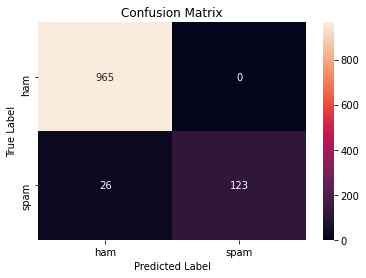

In [90]:
# precision, recall, f1-score, accuracy
precision, recall, fscore, train_support = score(y_test, y_pred, pos_label='spam', average='binary')
print('Precision: {} / Recall: {} / F1-Score: {} / Accuracy: {}'.format(
    round(precision, 3), round(recall, 3), round(fscore,3), round(acs(y_test,y_pred), 3)))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

class_label = ["ham", "spam"]
df_cm = pd.DataFrame(cm, index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Random Forest gives an accuracy of 97.7%. High-value F1-score is also obtained from the model. Confusion Matrix tells us that we correctly predicted 965 hams and 123 spams.0 hams were incorrectly identified as spams and 26 spams were incorrectly predicted as hams. Detecting spams as hams are justifiable as compared to hams as spams.

**Conclusion**

In summary, we learned how to perform basic NLP tasks and used a machine learning classifier to predict whether the SMS is Spam or Ham.